<a href="https://colab.research.google.com/github/ArtemBurenok/Machine_Learning_Course/blob/main/Multioutput_Classification_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import boxcox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel('data_case.xlsx')
data.head()

,Timestamp,Process: Reactor Number,Process: Shift Number,"Process: Soap mass, kg","Process: Regulator mass, kg","Process: Reagent 2 mass, kg","Process: Reagent 2 secondary mass, kg",Process: Extra regulator injections,Process: Regulator injection time to regulator tank,Process: Reagent 3 injection time to regulator tank,...,"Temperature, grad C","Pressure P0, mm Hg","Humidity U, %",Weather Conditions,"Product: 0 size mass output, %","Product: 1 size mass output, %","Product: 2 size mass output, %","Product: 3 size mass output, %","Product: 4 size mass output, %","Product: 5 size mass output, %"
0,2020-06-06 14:30:00,1,2.0,0.895,52.0,115.90,35.0,NaN,11:15:00,13:15:00,...,9.3,742.3,87,Thunder,1.15,12.39,48.60,37.04,0.51,0.32
1,2020-06-07 13:00:00,1,3.0,0.895,52.7,115.81,35.0,NaN,09:45:00,11:45:00,...,12.6,741.1,77,Rain,3.12,5.65,19.92,65.15,5.82,0.34
2,2020-06-08 00:00:00,1,2.0,0.895,52.8,115.90,35.0,1.0,21:00:00,23:00:00,...,8.9,741.3,95,Thunder,3.64,5.80,19.96,64.31,6.00,0.29
3,2020-06-08 22:30:00,1,3.0,0.895,52.5,116.35,35.0,0.0,19:30:00,21:30:00,...,17.4,740.3,47,Heavy rain,3.20,9.02,39.10,46.48,1.64,0.57
4,2020-06-09 10:00:00,1,5.0,0.895,52.3,116.30,35.0,NaN,06:45:00,08:45:00,...,10.4,742.4,69,0,3.01,6.43,27.34,59.64,2.93,0.65


In [ ]:
input_data = data.drop(['Product: 0 size mass output, %',
                                'Product: 1 size mass output, %',
                                'Product: 2 size mass output, %',
                                'Product: 3 size mass output, %',
                                'Product: 4 size mass output, %',
                                'Product: 5 size mass output, %'], axis=1)
target = data[['Product: 0 size mass output, %',
                'Product: 1 size mass output, %',
                'Product: 2 size mass output, %',
                'Product: 3 size mass output, %',
                'Product: 4 size mass output, %',
                'Product: 5 size mass output, %']]

## Разведочный анализ

In [ ]:
input_data.describe()

,Process: Reactor Number,Process: Shift Number,"Process: Soap mass, kg","Process: Regulator mass, kg","Process: Reagent 2 mass, kg","Process: Reagent 2 secondary mass, kg",Process: Extra regulator injections,"Water: mass, kg","Water: electric conductivity, mkSm",Water: Oxidizability,...,"Main chemical: chemical 10 mass fraction, %","Main chemical: chemical 11 mass fraction, %","Main chemical: chemical 12 mass fraction, %","Main chemical: chemical 13 mass fraction, %","Main chemical: chemical 14 mass fraction, %","Main chemical: chemical 15 mass fraction, %","Main chemical: Main chemical mass, kg","Temperature, grad C","Pressure P0, mm Hg","Humidity U, %"
count,384.000000,383.000000,384.000000,384.000000,384.000000,384.000000,343.000000,384.000000,384.000000,384.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,384.000000,384.000000,384.000000,384.000000
mean,2.541667,3.046997,0.893283,51.515964,116.278385,33.896615,1.549213,5873.154688,0.364635,0.299375,...,0.000443,0.000473,0.000216,0.017883,0.001637,0.000671,6595.853585,16.783333,740.545573,75.684896
std,1.116379,1.358659,0.041358,1.439079,0.449638,1.665473,2.111037,26.950688,0.185662,0.138066,...,0.000110,0.000101,0.000065,0.003041,0.000385,0.000092,4189.086061,4.377975,4.627986,16.635304
min,1.000000,1.000000,0.090500,48.700000,113.370000,31.500000,0.000000,5865.400000,0.060000,0.080000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.392600,5.300000,728.800000,31.000000
25%,2.000000,2.000000,0.890000,50.500000,116.000000,31.500000,0.000000,5870.200000,0.270000,0.200000,...,0.000400,0.000400,0.000200,0.016400,0.001400,0.000610,6394.400000,13.975000,737.600000,64.000000
50%,3.000000,3.000000,0.895000,51.350000,116.320000,35.000000,1.000000,5872.000000,0.320000,0.280000,...,0.000400,0.000500,0.000200,0.017550,0.001600,0.000690,6396.800000,16.400000,741.100000,80.000000
75%,4.000000,4.000000,0.900000,52.400000,116.565000,35.000000,3.000000,5874.200000,0.402500,0.330000,...,0.000500,0.000500,0.000300,0.019000,0.001800,0.000730,6399.400000,19.600000,744.625000,90.000000
max,4.000000,5.000000,0.910000,57.000000,117.520000,38.400000,20.000000,6397.000000,1.880000,0.920000,...,0.000900,0.000800,0.000300,0.029900,0.003600,0.001110,64000.800000,27.800000,748.000000,95.000000


In [ ]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Timestamp                                             384 non-null    datetime64[ns]
 1   Process: Reactor Number                               384 non-null    int64         
 2   Process: Shift Number                                 383 non-null    float64       
 3   Process: Soap mass, kg                                384 non-null    float64       
 4   Process: Regulator mass, kg                           384 non-null    float64       
 5   Process: Reagent 2 mass, kg                           384 non-null    float64       
 6   Process: Reagent 2 secondary mass, kg                 384 non-null    float64       
 7   Process: Extra regulator injections                   343 non-null    float64   

#### Проверка на пустые значения

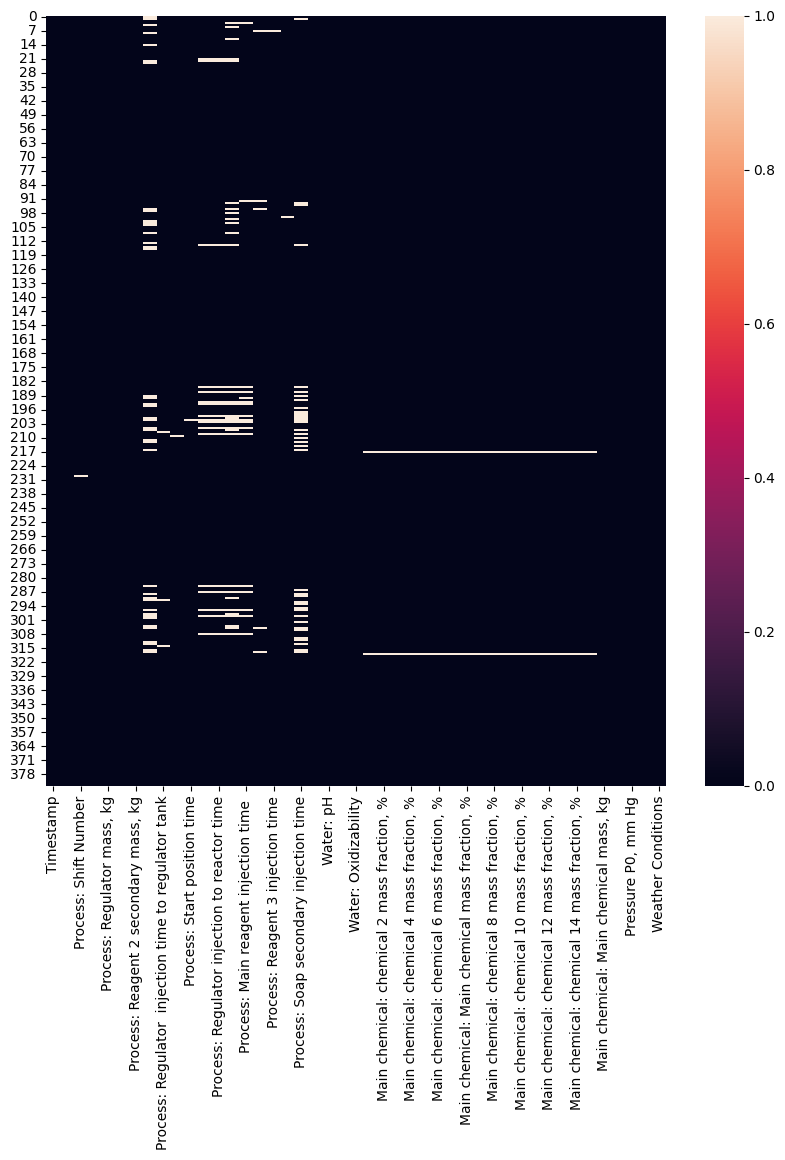

In [ ]:
import seaborn as sns

# независимые переменные
plt.figure(figsize=(10, 10))
sns.heatmap(input_data.isna())
plt.show()

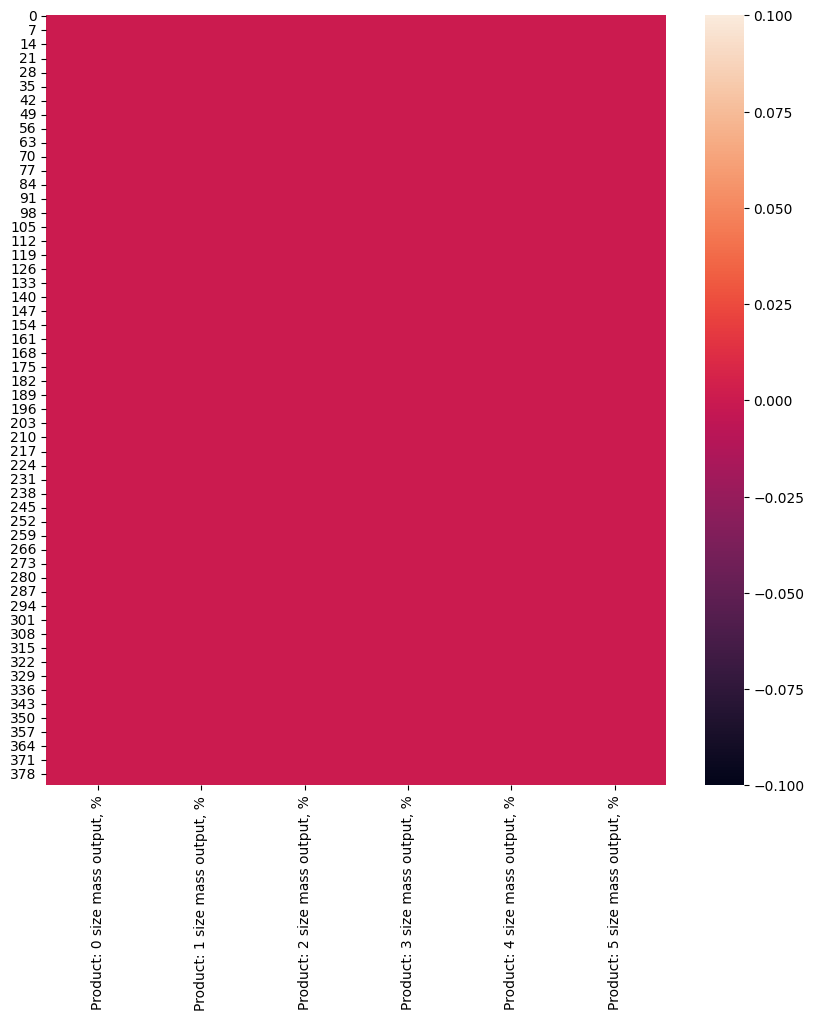

In [ ]:
# целевые переменные
plt.figure(figsize=(10, 10))
sns.heatmap(target.isna())
plt.show()

#### Корреляция

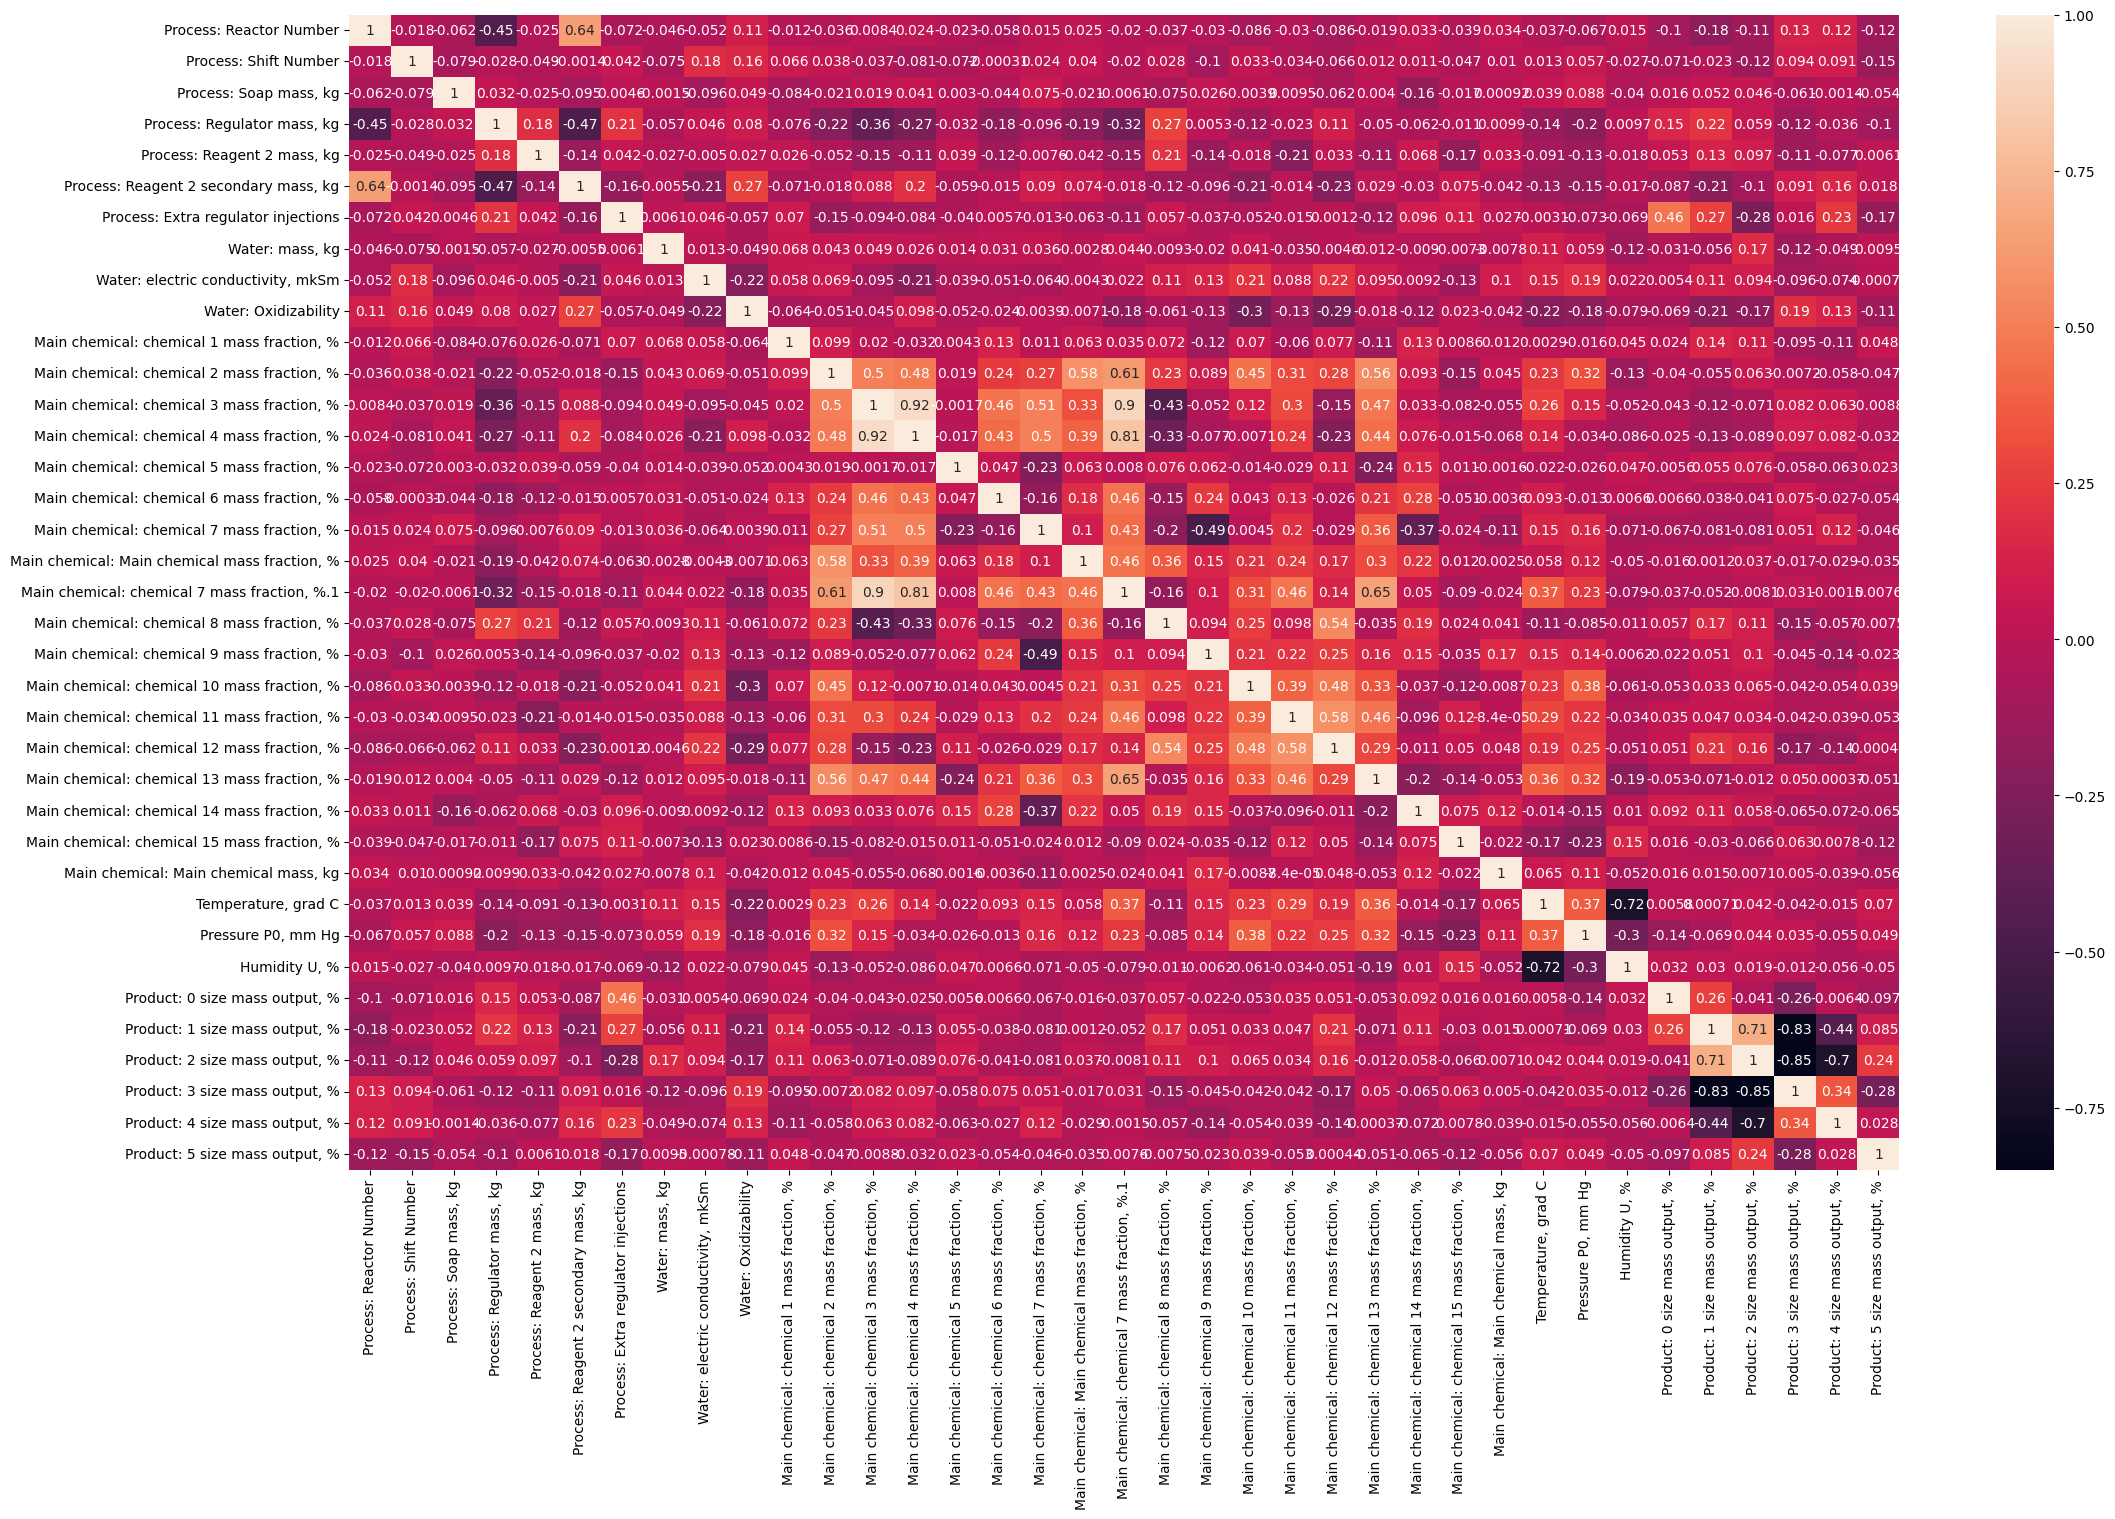

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()

#### Столбцы с временем

In [ ]:
object_list_time, hour_column_list = [], []

for col in input_data.columns:
    if input_data[col].dtype == 'object' and col not in ['Process: Reagent 2 mass, kg', 'Water: pH', 'Weather Conditions']:
        object_list_time.append(col)
        input_data[col + "_hour"] = input_data[col].apply(lambda x: str(x)[0: 2] if str(x)[0: 2] != 'na' else "10000")
        input_data[col + "_hour"] = input_data[col + '_hour'].astype(np.float32)

        hour_column_list.append(col + '_hour')

In [ ]:
input_data.drop(object_list_time, axis=1, inplace=True)

In [ ]:
for column in hour_column_list:
    input_data[column] = input_data[column].apply(lambda x: np.nan if x == 10000.0 else x)

In [ ]:
# очистка данных  от Nan
from sklearn.impute import KNNImputer

imputer_time = KNNImputer(n_neighbors=3)
input_data[hour_column_list] = imputer_time.fit_transform(input_data[hour_column_list])

In [ ]:
for i in range(len(hour_column_list) - 1):
    input_data[f'Difference_{i}_{i+1}'] = np.abs(input_data[hour_column_list[i]] - input_data[hour_column_list[i+1]])

In [ ]:
input_data.drop(hour_column_list, axis=1, inplace=True)

In [ ]:
# проверка
input_data.isna().sum()

Timestamp                                         0
Process: Reactor Number                           0
Process: Shift Number                             1
Process: Soap mass, kg                            0
Process: Regulator mass, kg                       0
Process: Reagent 2 mass, kg                       0
Process: Reagent 2 secondary mass, kg             0
Process: Extra regulator injections              41
Water: mass, kg                                   0
Water: pH                                         0
Water: electric conductivity, mkSm                0
Water: Oxidizability                              0
Main chemical: chemical 1 mass fraction, %        2
Main chemical: chemical 2 mass fraction, %        2
Main chemical: chemical 3 mass fraction, %        2
Main chemical: chemical 4 mass fraction, %        2
Main chemical: chemical 5 mass fraction, %        2
Main chemical: chemical 6 mass fraction, %        2
Main chemical: chemical 7 mass fraction, %        2
Main chemica

#### (Water: pH) processing

In [ ]:
for i in input_data['Water: pH']:
    if type(i) == datetime.time:
        print(i)

06:18:00
06:14:00


In [ ]:
# удаление данные с типом datetime.time в датасете с целевыми переменными
data = data[data['Water: pH'].apply(lambda x: type(x) != datetime.time)]

In [ ]:
# удаление данных из таблицы с независимыми переменными
input_data = input_data[input_data['Water: pH'].apply(lambda x: type(x) != datetime.time)]

In [ ]:
input_data['Water: pH'] = input_data['Water: pH'].astype(np.float32)

In [ ]:
input_data.drop(['Timestamp'], axis=1, inplace=True)

#### Weather Conditions processing

In [ ]:
# что означает 0?
input_data['Weather Conditions'].value_counts()

0             213
Heavy rain     85
Thunder        38
Rain           24
Cloudy         13
Drizzle         6
Fog             3
Name: Weather Conditions, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

label_data = encoder.fit_transform(input_data['Weather Conditions'].astype(str))

In [ ]:
input_data['Weather Conditions'] = label_data

#### Распределение целевых переменных

In [ ]:
def distribution_target(type_change: str = "None"):
    fig, axs = plt.subplots(nrows=int(target.shape[1] / 2), ncols=2, figsize=(7, 8))

    fig.tight_layout()

    columns = target.columns

    for row in range(int(target.shape[1] / 2)):
        for col in range(2):
            if type_change == 'None':
                axs[row, col].hist(target[columns[row + col]], color='b')
            elif type_change == 'log':
                axs[row, col].hist(target[columns[row + col]].apply(lambda x: np.log(x)), color='b')

            axs[row, col].legend(["Product size mass %"])
            axs[row, col].set_title(columns[row])

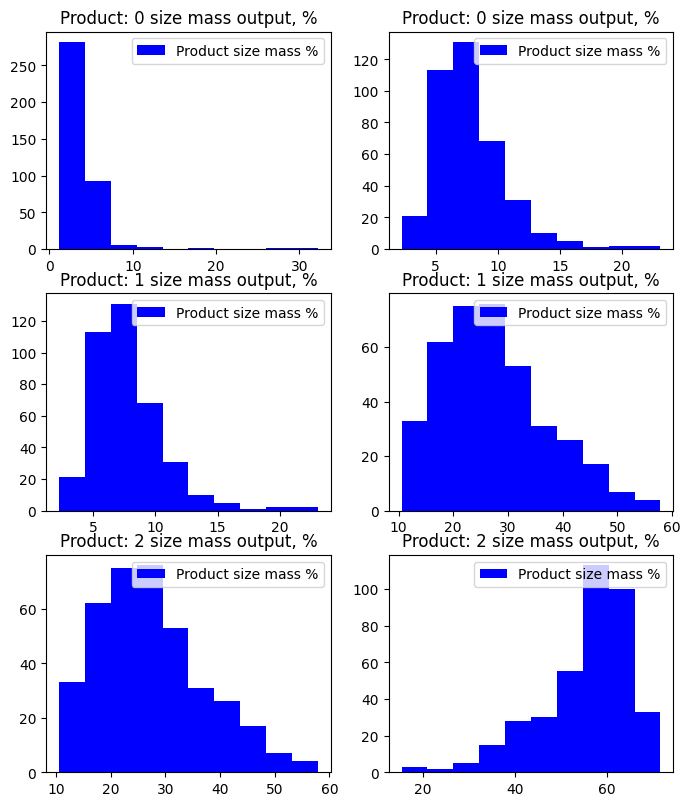

In [ ]:
distribution_target()

#### Распределение логарифма целевых переменных

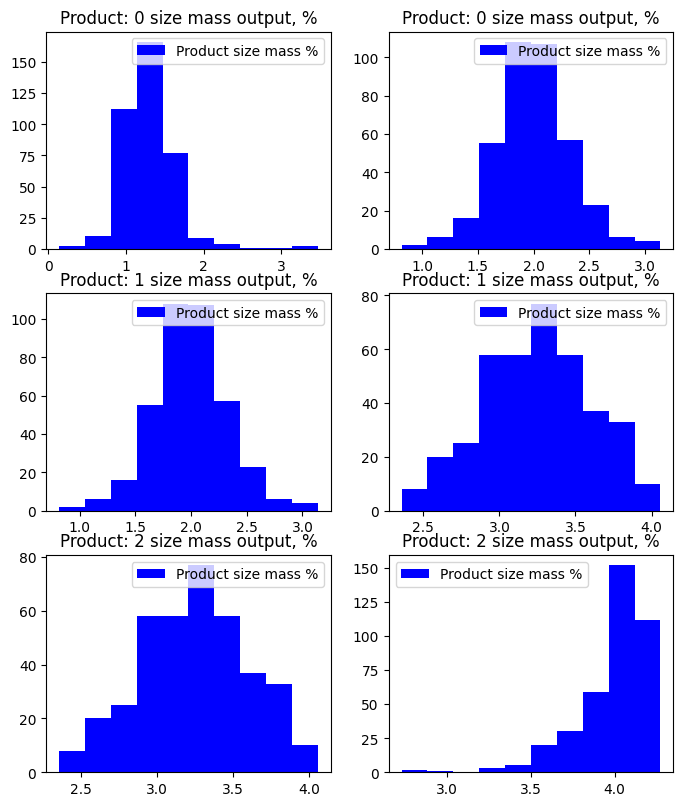

In [ ]:
distribution_target('log')

## Очистка данных от Nan

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=3)
train_data = imputer.fit_transform(input_data)

## Проверка на корреляцию в независимых переменных

In [ ]:
dataframe_norm = pd.DataFrame(train_data)
columns_list = dataframe_norm.columns

drop_list = []

for col_1 in columns_list:
    for col_2 in columns_list:
        corr = np.corrcoef(dataframe_norm[col_1], dataframe_norm[col_2])[1][0]
        if np.abs(corr) >= 0.9 and col_1 != col_2:
            drop_list.append(col_1) if col_1 not in drop_list else drop_list
            drop_list.append(col_2) if col_2 not in drop_list else drop_list

In [ ]:
dataframe_norm.drop(drop_list, axis=1, inplace=True)

## Тренировка модели (регрессия)

In [ ]:
target = data[['Product: 0 size mass output, %',
                'Product: 1 size mass output, %',
                'Product: 2 size mass output, %',
                'Product: 3 size mass output, %',
                'Product: 4 size mass output, %',
                'Product: 5 size mass output, %']]

In [ ]:
# нормировка
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data = scaler.fit_transform(dataframe_norm)

In [ ]:
# логарифмирование целевой переменной.
train_target = pd.DataFrame()

for col in target.columns:
    train_target[col] = target[col].apply(lambda x: np.log(x))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.3, random_state=42)

In [ ]:
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train.fillna(np.mean(y_train), inplace=True)

In [ ]:
y_test.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test.fillna(np.mean(y_train), inplace=True)

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [ ]:
def report(model):
    print("Train: {}; Test: {}".format(model.score(X_train, y_train), model.score(X_test, y_test)))

In [ ]:
report(model)

Train: 0.27289491266828; Test: -0.5327520887219718


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
tree = MultiOutputRegressor(DecisionTreeRegressor(max_depth=2))
tree.fit(X_train, y_train)

MultiOutputRegressor(estimator=DecisionTreeRegressor(max_depth=2))

In [ ]:
tree.score(X_test, y_test)

0.03429900681310102

In [ ]:
report(tree)

Train: 0.19664261198626928; Test: 0.03429900681310102


#### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=350, max_depth=4))
forest_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=4,
                                                     n_estimators=350))

In [ ]:
forest_model.score(X_test, y_test)

0.09695194904765898

In [ ]:
report(forest_model)

Train: 0.5319630301400672; Test: 0.09695194904765898


#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boost = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=30, max_depth=2))
boost.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=2,
                                                         n_estimators=30))

In [ ]:
report(boost)

Train: 0.43286494145035875; Test: 0.07733575014698398


## Уменьшение размерности

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
train = pca.fit_transform(train_data)

## Тренировка модели (классификация)

In [ ]:
target = data[['Product: 0 size mass output, %',
                'Product: 1 size mass output, %',
                'Product: 2 size mass output, %',
                'Product: 3 size mass output, %',
                'Product: 4 size mass output, %',
                'Product: 5 size mass output, %']]

In [ ]:
target = target / 100

In [ ]:
target

,"Product: 0 size mass output, %","Product: 1 size mass output, %","Product: 2 size mass output, %","Product: 3 size mass output, %","Product: 4 size mass output, %","Product: 5 size mass output, %"
0,0.0115,0.1239,0.4860,0.3704,0.0051,0.0032
1,0.0312,0.0565,0.1992,0.6515,0.0582,0.0034
2,0.0364,0.0580,0.1996,0.6431,0.0600,0.0029
3,0.0320,0.0902,0.3910,0.4648,0.0164,0.0057
4,0.0301,0.0643,0.2734,0.5964,0.0293,0.0065
...,...,...,...,...,...,...
379,0.0360,0.0600,0.2238,0.6330,0.0440,0.0010
380,0.0278,0.0448,0.1775,0.6690,0.0787,0.0023
381,0.0413,0.0632,0.2115,0.6251,0.0581,0.0008
382,0.0480,0.0856,0.2536,0.5752,0.0352,0.0024


In [ ]:
for column in target.columns:
    target[column] = target[column].apply(lambda x: 0 if x <= 0.02 else x)
    target[column] = target[column].apply(lambda x: 3 if x > 0.4 else x)

for column in target.columns:
    target[column] = target[column].apply(lambda x: 1 if 0.02 < x <= 0.2 else x)
    target[column] = target[column].apply(lambda x: 2 if 0.2 < x <= 0.4 else x)

In [ ]:
target

,"Product: 0 size mass output, %","Product: 1 size mass output, %","Product: 2 size mass output, %","Product: 3 size mass output, %","Product: 4 size mass output, %","Product: 5 size mass output, %"
0,0.0,1.0,3.0,2.0,0.0,0.0
1,1.0,1.0,1.0,3.0,1.0,0.0
2,1.0,1.0,1.0,3.0,1.0,0.0
3,1.0,1.0,2.0,3.0,0.0,0.0
4,1.0,1.0,2.0,3.0,1.0,0.0
...,...,...,...,...,...,...
379,1.0,1.0,2.0,3.0,1.0,0.0
380,1.0,1.0,1.0,3.0,1.0,0.0
381,1.0,1.0,2.0,3.0,1.0,0.0
382,1.0,1.0,2.0,3.0,1.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

In [ ]:
y_train

,"Product: 0 size mass output, %","Product: 1 size mass output, %","Product: 2 size mass output, %","Product: 3 size mass output, %","Product: 4 size mass output, %","Product: 5 size mass output, %"
336,1.0,1.0,2.0,3.0,1.0,0.0
140,1.0,1.0,2.0,3.0,1.0,0.0
132,1.0,1.0,1.0,3.0,1.0,0.0
230,1.0,1.0,3.0,2.0,1.0,0.0
154,1.0,1.0,2.0,3.0,1.0,0.0
...,...,...,...,...,...,...
71,1.0,1.0,2.0,3.0,1.0,0.0
106,1.0,1.0,2.0,3.0,1.0,0.0
272,1.0,1.0,3.0,2.0,1.0,0.0
350,1.0,1.0,1.0,3.0,1.0,0.0


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

def classification_report(classification_model):
    print(f"Train score: {classification_model.score(X_train, y_train)}; Test score: {classification_model.score(X_test, y_test)}")

#### Extra Tree

In [ ]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

extra_tree_class = MultiOutputClassifier(ExtraTreeClassifier(max_depth=4))
extra_tree_class.fit(X_train, y_train)

MultiOutputClassifier(estimator=ExtraTreeClassifier(max_depth=4))

In [ ]:
classification_report(extra_tree_class)

Train score: 0.4868913857677903; Test score: 0.5130434782608696


#### K neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbor_classifier = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5))
neighbor_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier())

In [ ]:
classification_report(neighbor_classifier)

Train score: 0.5355805243445693; Test score: 0.4


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

tree_model = MultiOutputClassifier(DecisionTreeClassifier(max_depth=2))
tree_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=2))

In [ ]:
classification_report(tree_model)

Train score: 0.5093632958801498; Test score: 0.591304347826087


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=550, max_depth=5))
forest_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                       n_estimators=550))

In [ ]:
classification_report(forest_classifier)

Train score: 0.6292134831460674; Test score: 0.5826086956521739


## Нейронная сеть

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

In [ ]:
target_data = data[['Product: 0 size mass output, %',
                'Product: 1 size mass output, %',
                'Product: 2 size mass output, %',
                'Product: 3 size mass output, %',
                'Product: 4 size mass output, %',
                'Product: 5 size mass output, %']] / 100

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=train_data.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(target_data.shape[1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               5120      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dense_30 (Dense)            (None, 6)                

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mse'])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[r2_score], run_eagerly=True)

In [ ]:
model.fit(train_data, target_data, epochs=65)

Epoch 1/65
12/12 [==============================] - 1s 92ms/step - loss: 1.7940 - r2_score: -793.7879
Epoch 2/65
12/12 [==============================] - 1s 95ms/step - loss: 1.6629 - r2_score: -763.5894
Epoch 3/65
12/12 [==============================] - 1s 93ms/step - loss: 1.4531 - r2_score: -628.1636
Epoch 4/65
12/12 [==============================] - 1s 92ms/step - loss: 1.3211 - r2_score: -283.3990
Epoch 5/65
12/12 [==============================] - 2s 131ms/step - loss: 1.2820 - r2_score: -194.5495
Epoch 6/65
12/12 [==============================] - 2s 128ms/step - loss: 1.2565 - r2_score: -164.9940
Epoch 7/65
12/12 [==============================] - 1s 91ms/step - loss: 1.2392 - r2_score: -85.9050
Epoch 8/65
12/12 [==============================] - 1s 94ms/step - loss: 1.2266 - r2_score: -61.4602
Epoch 9/65
12/12 [==============================] - 1s 93ms/step - loss: 1.2168 - r2_score: -45.8921
Epoch 10/65
12/12 [==============================] - 1s 95ms/step - loss: 1.2085 - 